# Ex Chap_8 Credit Card Fraud Detection via Dimension Reduction

Dataset:[kaggle Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_import = pd.read_csv('../../data_local/creditcard.csv') # large file 150MB

In [3]:
data_import

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
unused = data_import[["Time","Amount"]]
X = data_import.iloc[:,1:-2] # remove the first "time" and last "amount" "class" columns
y = data_import["Class"]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [5]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=10) # 10 components
X10D = pca.fit_transform(X) # numpy form ugly
X10D = pd.DataFrame(X10D)
X10D

,0,1,2,3,4,5,6,7,8,9
0,1.359915,0.074866,-2.535596,1.387093,0.336250,0.468022,0.247202,-0.064151,0.445502,0.025636
1,-1.191864,-0.266584,-0.167669,0.445425,-0.059390,-0.081702,-0.076891,-0.089144,-0.297027,0.091213
2,1.358414,1.342281,-1.771865,0.388768,0.500062,1.807426,0.802982,-0.201524,-1.426661,-0.225679
3,0.965892,0.179099,-1.789900,-0.885152,0.014259,1.228648,0.213971,-0.460159,-1.516058,-0.127967
4,1.158383,-0.875257,-1.548163,0.412911,0.405349,0.101599,0.600321,0.308232,0.943241,-0.617821
...,...,...,...,...,...,...,...,...,...,...
284802,11.881017,-10.070295,9.839399,-2.054912,5.359518,-2.600672,-4.900649,-7.297716,2.265554,-4.071628
284803,0.733120,0.059293,-2.037573,-0.725801,-0.869666,1.071424,0.046351,-0.233373,0.609753,1.060501
284804,-1.919559,0.302011,3.250672,-0.554365,-2.631440,3.032621,-0.294845,-0.700712,0.424211,0.554448
284805,0.240714,-0.525806,-0.701453,0.708828,0.374138,0.635826,-0.667929,-0.608641,0.523574,0.611671


In [8]:
# 95 %  explained variance ratio 
pca = PCA()
XD = pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 
d

22

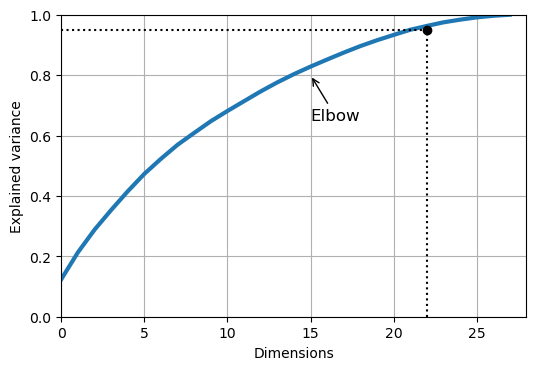

In [9]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.axis([0, 28, 0, 1])
ax.set(xlabel="Dimensions", ylabel="Explained variance")
ax.plot(cumsum, lw=3)
ax.plot([d, d], [0, 0.95], "k:")
ax.plot([0, d], [0.95, 0.95], "k:")
ax.plot(d,0.95,"ko")
ax.annotate("Elbow",
            xy=(15, 0.8),
            xytext=(15, 0.65),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')
ax.grid()

PCA can be used to compress the amount of information that has to be plotted. 

Let's say that you perform PCA and take in all the components that constitute 95% of the variance in the dataset.You can then take those PCA's and inverse transform them to get something close to the origina data. 

- The 5% that you'll be missing is part of the **reconstruction error**.

In [10]:
pca = PCA(n_components=10)  # 10 components
X10D = pca.fit_transform(X)  # numpy form ugly
X10D = pd.DataFrame(X10D)
X10D_inverse = pca.inverse_transform(X10D)
X10D_inverse = pd.DataFrame(X10D_inverse)
X10D_inverse

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.359804,-0.072720,2.536575,1.377895,-0.338153,0.461438,0.238003,0.099016,0.364376,0.094719,...,0.001885,0.002331,-0.003682,-0.002327,0.000130,-0.000436,0.000186,0.000137,0.000018,-4.093900e-07
1,1.191787,0.265875,0.166339,0.449332,0.058732,-0.079349,-0.072764,0.083258,-0.254190,-0.177081,...,-0.001234,-0.002277,0.003435,0.000672,-0.000228,-0.000179,0.000005,-0.000088,-0.000016,-5.000687e-09
2,-1.357936,-1.339523,1.770870,0.377661,-0.495559,1.806666,0.784689,0.246563,-1.524087,0.170922,...,-0.001634,-0.005816,0.008905,-0.001343,-0.000224,0.000752,-0.000419,-0.000210,-0.000014,-3.180432e-06
3,-0.966056,-0.185069,1.792071,-0.863624,-0.006096,1.252866,0.234119,0.373459,-1.386994,-0.079379,...,-0.003055,-0.006365,0.009749,0.001308,-0.000323,0.000602,-0.000352,-0.000285,-0.000031,-2.476550e-06
4,-1.158218,0.877901,1.549063,0.402343,-0.406479,0.094203,0.589607,-0.270016,0.814623,0.745514,...,0.005758,0.009723,-0.014801,-0.004072,0.000872,0.001104,-0.000019,0.000386,0.000070,-1.259657e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881050,10.072018,-9.833905,-2.067443,-5.363346,-2.608055,-4.922932,7.305492,1.922646,4.367696,...,0.023374,0.060745,-0.090947,0.005098,0.006421,0.022709,-0.002957,0.001344,0.000363,-8.656245e-06
284803,-0.732411,-0.054715,2.032293,-0.739610,0.875121,1.067421,0.022041,0.291448,0.574062,-1.024512,...,-0.004501,-0.009459,0.014201,0.001010,-0.000702,-0.004505,0.000835,-0.000215,-0.000063,4.167164e-06
284804,1.919888,-0.300933,-3.252109,-0.559031,2.635521,3.034792,-0.298597,0.710234,0.418554,-0.511648,...,-0.005764,-0.011244,0.017526,0.002950,-0.000394,-0.004362,0.000550,-0.000258,-0.000055,5.624689e-06
284805,-0.240433,0.530510,0.702315,0.689633,-0.377905,0.623144,-0.686476,0.679707,0.390242,-0.396966,...,-0.001400,-0.002015,0.002996,0.001059,-0.000221,-0.001364,0.000310,-0.000050,-0.000020,1.609483e-06


In [11]:
X10D # compare

,0,1,2,3,4,5,6,7,8,9
0,1.359803,0.072719,-2.536579,1.377880,0.338280,0.461337,0.238097,-0.098984,0.363653,0.097638
1,-1.191786,-0.265875,-0.166349,0.449334,-0.058712,-0.079387,-0.072827,-0.083281,-0.252800,-0.179095
2,1.357937,1.339521,-1.770942,0.377626,0.495915,1.806390,0.784878,-0.246465,-1.525570,0.158238
3,0.966057,0.185069,-1.792136,-0.863642,0.006366,1.252667,0.234168,-0.373433,-1.386463,-0.090726
4,1.158216,-0.877902,-1.549022,0.402330,0.406446,0.094242,0.589824,0.270124,0.808829,0.752106
...,...,...,...,...,...,...,...,...,...,...
284802,11.881040,-10.072012,9.834398,-2.067377,5.362189,-2.606656,-4.921646,-7.305445,1.889399,4.387479
284803,0.732413,0.054715,-2.032381,-0.739620,-0.874853,1.067284,0.021953,-0.291518,0.581930,-1.020518
284804,-1.919882,0.300934,3.251952,-0.559026,-2.635128,3.035286,-0.298174,-0.710205,0.422094,-0.509836
284805,0.240433,-0.530510,-0.702330,0.689627,0.378038,0.623108,-0.686438,-0.679771,0.393359,-0.393790


If you have a lot of dimensions in your PCA then you might want to take a stochastic approach where the computer will try and estimate your PCAs instead of calculating them. 

You can do thisby setting the `svd_ solver` hyperparameter of the `PCA` clags to `randomized`. By default, this hyperparameter is set to `auto` which means that skLearn will run the full PCA unless the amountof dimensions is too high. You can force it to run the full PCA by setting the `svd_ solver` hyperparameter to `full`.

PCAs work only if the whole training dataset fits into memory. Luckily you can run the PCAincrementally using the `Incremental PCA` class.

More work:

1. imbalanced data

2. confusion matrix

In [12]:
### Compare KernelPCA with LogisticRegression

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import KernelPCA

In [13]:
# clf = Pipeline([
#     ("kpca",KernelPCA(n_components=2)),
#     ("log_reg",LogisticRegression())
# ])

# param_grid = [{
#     "kpca__gamma":np.linspace(0.03,0.05,10),
#     "kpca__kernel":["rbf","sigmoid"]
# }]

In [14]:
# grid_search = GridSearchCV(clf, param_grid, cv=3)
# grid_search.fit(X,y) ## >6min

In [15]:
# print(grid_search.best_params_)